In [67]:
import pandas as pd                 # for working with data in Python
import numpy as np
import matplotlib.pyplot as plt     # for visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [68]:
# Using Pandas to read in csv files. The pd.read_csv() method creates a DataFrame from a csv file
train = pd.read_csv('C:\\Users\\veni_\\Desktop\\Projects\\Kaggle\\House Price Predictions\\Files\\train.csv')
test = pd.read_csv('C:\\Users\\veni_\\Desktop\\Projects\\Kaggle\\House Price Predictions\\Files\\test.csv')

In [69]:
# Checking the size of the data
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [70]:
# Looking at a few rows using the DataFrame.head() method
# train.head()
print(train.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [71]:
print(train.keys())

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [72]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [73]:
plt.style.use(style = "ggplot")
plt.rcParams["figure.figsize"] = (10, 6)

#  2. Explore the data and engineer Features  

In [74]:
# The value we are trying to predict is often called the target variable. Here, we are calling it "Sales price"

# To get more information viz.. count, mean, std, min, max etc., we can use series.describe() method.

print(train.SalePrice.describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Skew is: 1.8828757597682129


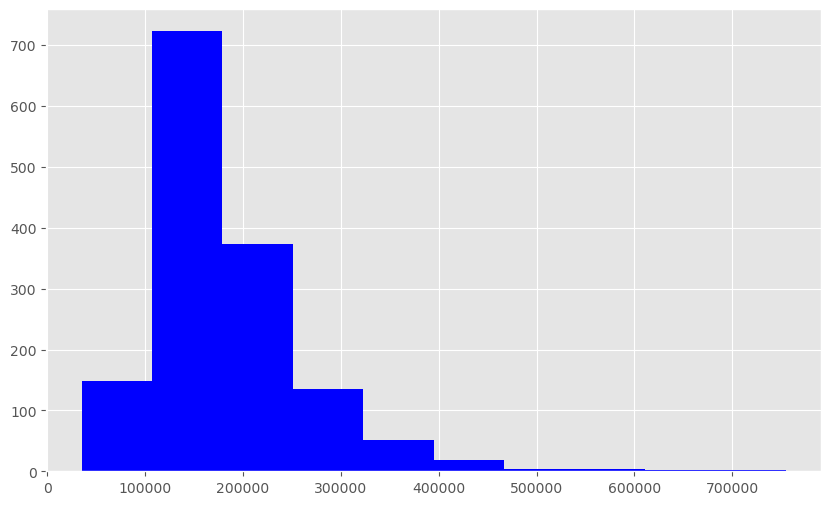

In [75]:
# Now we will check the skewness which is a measure of the shape of the distribution of values. 
# to plot a histogram of SalePrice
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

# Since the distribution has longer tail on the right, the distribution is positively skewed.


 Skew is: 0.12133506220520406


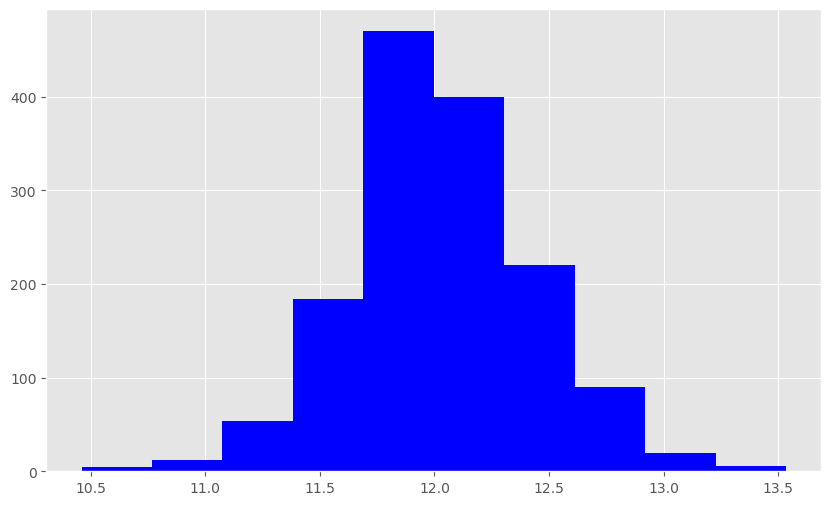

In [76]:
# Use np.log() to transform train.SalePrice and calculate the skewness a second time, as well as re-plot the data

target = np.log(train.SalePrice)
print ("\n Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

# When performing regression, sometimes it makes sense to log-transform the target variable. One reason for this is to
# improve the linearity of data.

# The predictions from the final model will also be log-transformed, we will have to convert these predictions
# back to their original form later. 
# np.log will transform the variable
# np.exp will reverse the transformation

# As per the below histogram, we were able to plot a histogram with normal distribution.
# A value closr to 0 means that we have improved the skewness of the data. Now, we can see there is a normal distribution.

#   Working with Numeric Features / (Feature Engineering)

Feature Engineering is a process of making features of the data suitable for use in machine learning and modeling.

In [77]:
# return a subset of columns matching the specified data types
numeric_features = train.select_dtypes(include=[np.number])
# numeric_features.dtypes
print(numeric_features.dtypes)

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object


In [78]:
# Dataframe.corr() method displays the correlation between the columns and examine the correlations between the features and the target.
corr = numeric_features.corr()



In [79]:
# The first five features are the most positively correlated with SalePrice, while the next five are the most 
# negatively correlated.
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [80]:
#to get the unique values that a particular column has.
#train.OverallQual.unique()
print(train.OverallQual.unique())

[ 7  6  8  5  9  4 10  3  1  2]


In [81]:
# Investigating the relationship between OverallQual and SalePrice.
#We set index='OverallQual' and values='SalePrice'. We chose to look at the median here.
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
print(quality_pivot)

             SalePrice
OverallQual           
1                50150
2                60000
3                86250
4               108000
5               133000
6               160000
7               200141
8               269750
9               345000
10              432390


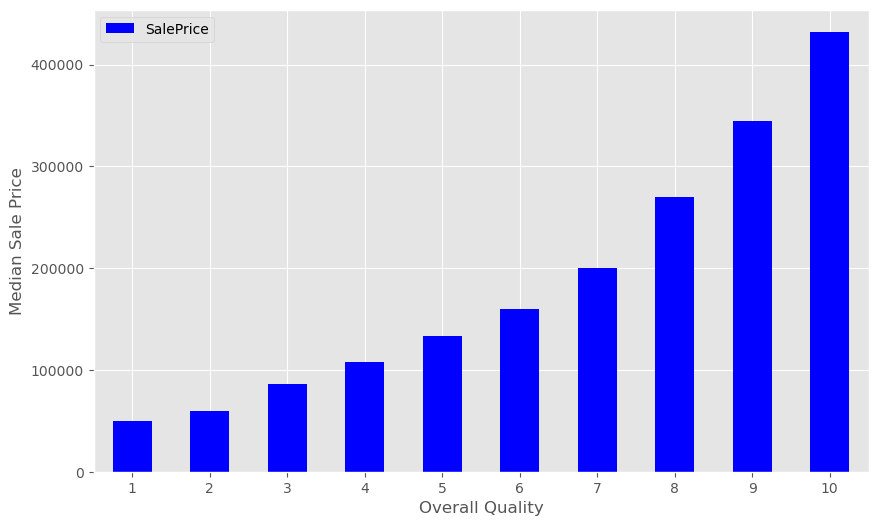

In [82]:
# To visualize this pivot table more easily, we can create a bar plot
# Notice that the median sales price strictly increases as Overall Quality increases.
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

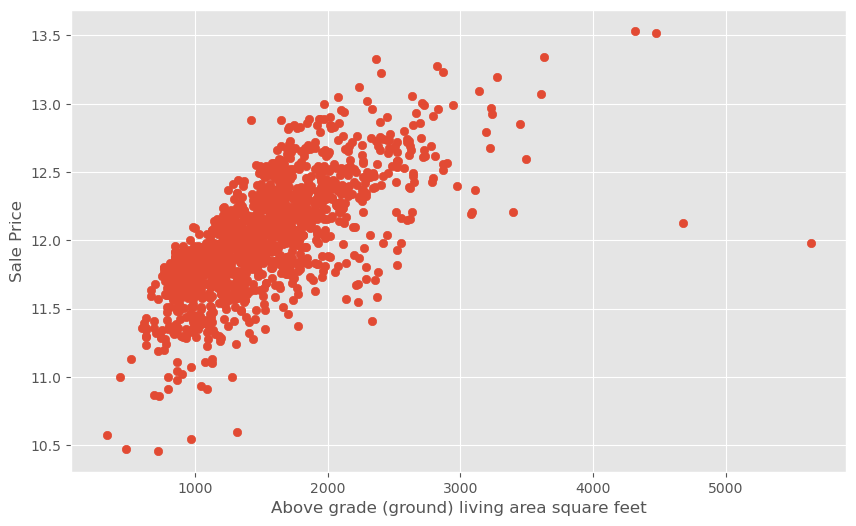

In [83]:
# To generate some scatter plots and visualize the relationship between the Ground Living Area(GrLivArea) and SalePrice
plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

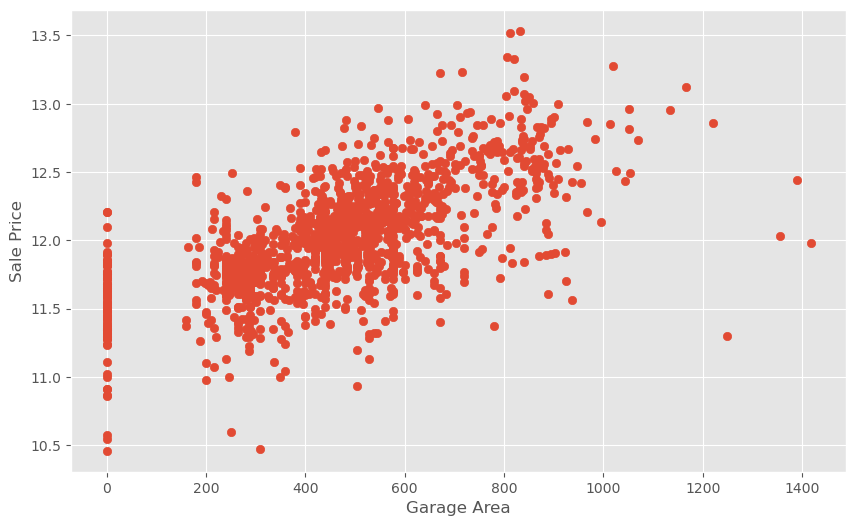

In [84]:
# Doing the same with GarageArea.
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

# As you can see that there are many homes with 0 Garage Area, indicating that they don't have a Garage. There are few
# # outliers as well. Outliers can affect a regression model by pulling the estimated regression line further away from
# the true population regression line. Therefore, we have removed those observations from the data.

# Creating a new dataframe with some outliers removed


In [85]:
# Creating a new dataframe with some outliers removed
train = train[train['GarageArea'] < 1200]


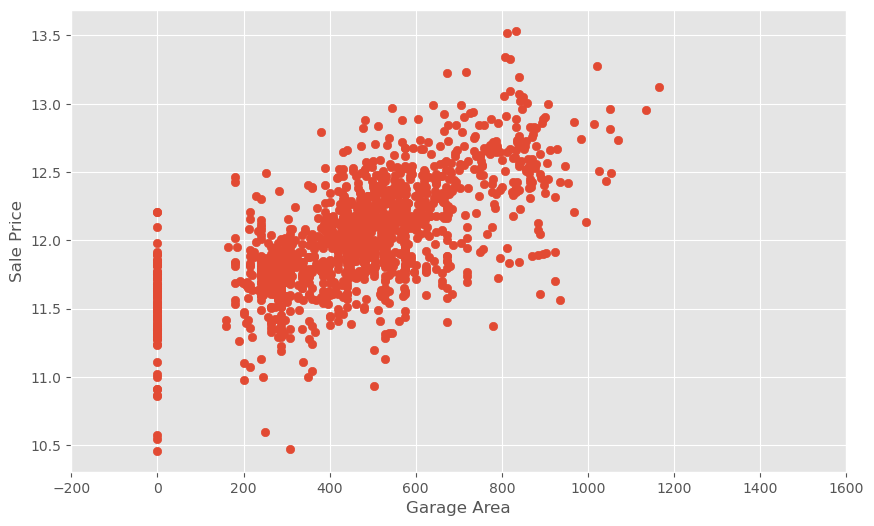

In [86]:
# Displaying the previous graph again without outliers
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600)     # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()


In [87]:
# Creating a DataFrame to view the top null columns. Chaining together the train.isnull().sum() methods, we return a series
# of the counts of the null values in each column
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
#nulls
print(nulls)

              Null Count
Feature                 
PoolQC              1449
MiscFeature         1402
Alley               1364
Fence               1174
FireplaceQu          689
LotFrontage          258
GarageYrBlt           81
GarageCond            81
GarageType            81
GarageFinish          81
GarageQual            81
BsmtFinType2          38
BsmtExposure          38
BsmtQual              37
BsmtCond              37
BsmtFinType1          37
MasVnrArea             8
MasVnrType             8
Electrical             1
Id                     0
Functional             0
Fireplaces             0
KitchenQual            0
KitchenAbvGr           0
BedroomAbvGr           0


In [88]:
# To return a list of the unique values
print ("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


#   Wrangling the non-numeric Features


In [89]:
# Consider the non-numeric features and display details of columns
categoricals = train.select_dtypes(exclude=[np.number])
#categoricals.describe()
print(categoricals.describe())


# The "count" column indicates the count of non-null observations, while "unique" counts the number of unique values. "top"
# is the most commonly occuring value, with the "frequency" of the top value shown by freq.

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1455   1455    91     1455        1455      1455      1455   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1147   1450    50      921        1309      1454      1048   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1455         1455       1455  ...       1374         1374   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1378          225       1257  ...        867          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1374       1374       1455      6    281          53     1455   
unique          5          5          3      3      4           4        9   
top            TA         TA      

#   Transforming and Engineering features

In [90]:
# For many of these features, we might want to use one-hot encoding to make use of the information for modeling.

# one-hot encoding is a technique which will transform categorical data into numbers so that model can understand whether or
# not a particular observation falls into one category or another.


# When transforming features, it's important to remember that any transformations that you've applied to the training data 
# before fitting the model must be applied to the test data.

#Eg: 

# 1: Consider the street data, which indicates whether there is a Gravel or Pavel road access to the property.

print ("Original: \n")
print (train.Street.value_counts(), "\n")


# In the Street column, the unique values are Pave and Grvl, which describes the type of road access to the property.


Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



# Below code is imp. as it will tells us how to do hot-encoding.

In [91]:
# our model needs numerical data, so we will use one-hot encoding to transform the data into a Boolean column.
# create a new column called enc_street. The pd.get_dummies() method will handle this for us
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(test.Street, drop_first=True)
print ('Encoded: \n')
print (train.enc_street.value_counts())  # Pave and Grvl values converted into 1 and 0

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


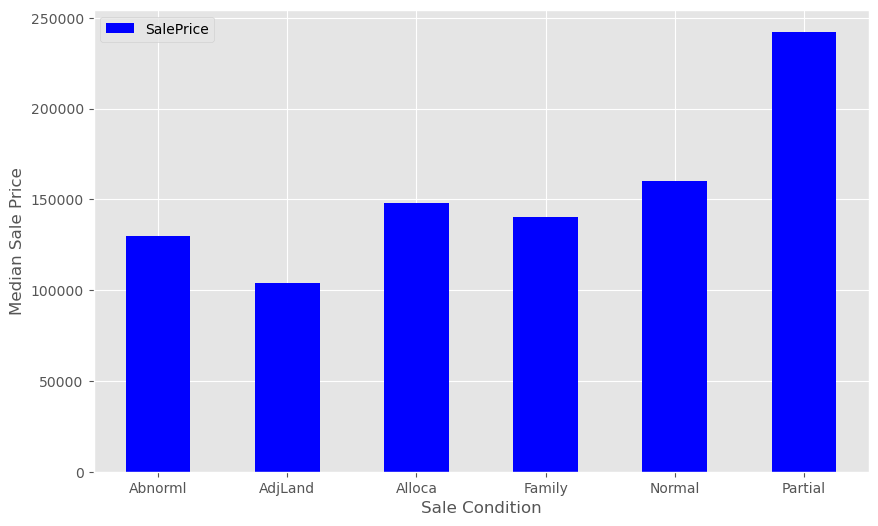

In [92]:
# Observing SaleCondition by constructing and plotting a pivot table, as we did above for OverallQual
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

# # Notivce that Partial has a significantly higher Median Sale Price that the others. We will encode this as a new feature.
# We will select all the houses where Salecondition is equal to Partial and assign the value 1, otherwise assign 0.

In [93]:
# encode this SaleCondition as a new feature by using a similar method that we used for Street above
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)


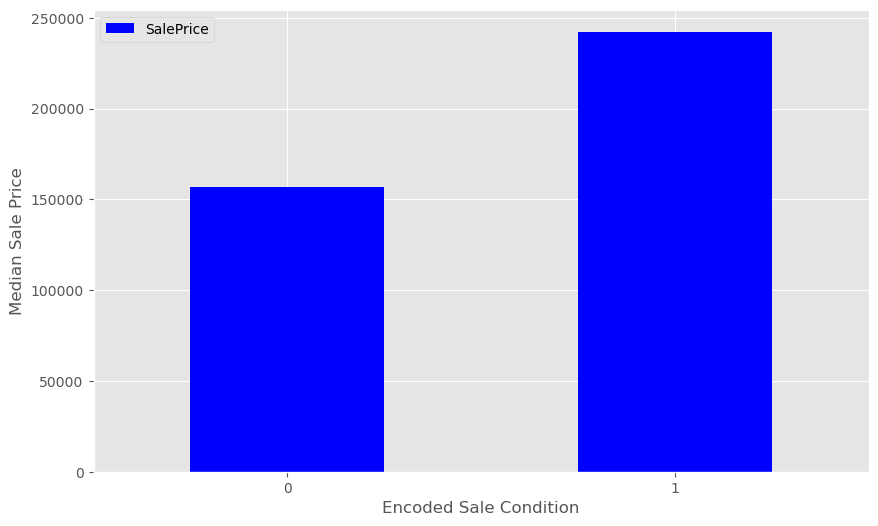

In [94]:
# explore this newly modified feature as a plot.
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()


#   Dealing with missing values
#   We'll fill the missing values with an average value and then assign the results to data. This is a method of interpolation.

The DataFrame.interpolate()method makes this simple.

In [95]:
# Below code tells you how to check if there are any null values and how to fill those missing values with average values.

In [96]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()


# Check if the all of the columns have 0 null values.
# sum(data.isnull().sum() != 0)
print(sum(data.isnull().sum() != 0))

# The below result shows that there are no null values.

0


#  3. Build a linear model


In [97]:
# separate the features and the target variable for modeling.
# We will assign the features to X and the target variable(Sales Price)to y.

y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

# Using np.log(), as explained above to transform y variable for the model.
# data.drop([features], axis = 1) tells pandas which features we want to exclude.

# We won't include SalePrice since it is a target variable, and id is just an index with no relationship to Saleprice.

# PartitionING the data 

#Partitioning the data in this way allows us to evaluate how our model might perform on data that it has never seen before.
#If we train the model on all of the test data, it will be difficult to tell if overfitting has taken place.

In [98]:
# Also we have to state how many percentage fr|om train data set, we want to take as test data set
# In this example, about 33% of the data is devoted to the hold-out set(test data set).
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

# Begin modelling

Creating a Linear Regression Model                        #


In [99]:
# First we need to create a Linear Regression model.
# For that first we will instantiate the model.
lr = linear_model.LinearRegression()

In [100]:
# Fit the model / Model fitting = This is used to estimate the relationship between our predictors and the target
# variable so we can make accurate predictions on the new data. We have fitted the model usign X_train and y_train and we
# scored X_test and y_test.
# The lr.fit() method will fit the linear regression on the features and target variable that we pass.
model = lr.fit(X_train, y_train)

In [101]:
# Evaluate the performance and visualize results
# The r-squared value is a measure of how close the data are to the fitted regression line
# It takes a value between 0 and 1, 1 meaning that all of the variance in the target is explained by the data.
# In general, a higher r-squared value means a better fit(very close to value 1)
# The model score returns the r-squared value by default.
print("R^2 is: \n", model.score(X_test, y_test))
# it is approximately 89% in my target variable.

R^2 is: 
 0.8882477709262533


In [102]:
# Next, we are going to consider root-mean-squared error(RMSE).
# To do so, we will use the model we have built to make predictions on the test data set.
predictions = model.predict(X_test)

In [103]:
# The RMSE measures the distance between the predicted values and actual values.
# calculates the rmse
print('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.017841794519567897


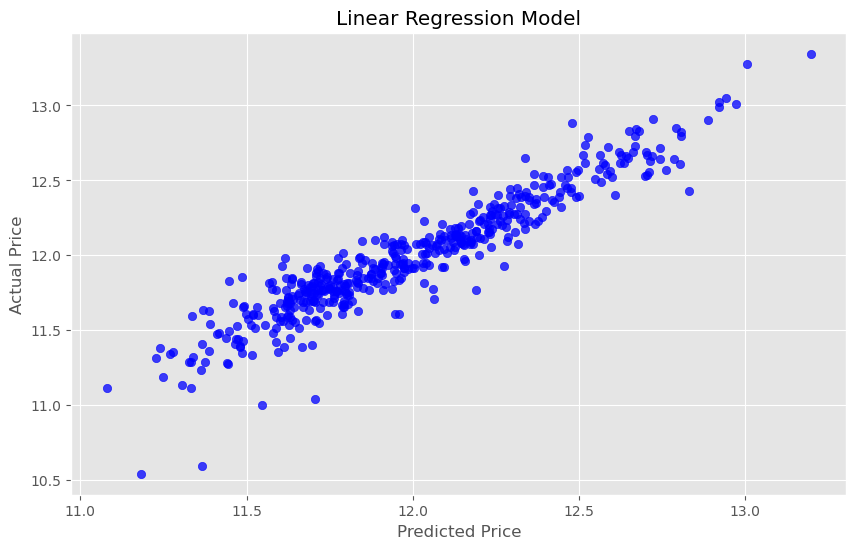

In [104]:
# We can view this relationship between predictions and actual_values graphically with a scatter plot.
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

# If the predicted values are identical to the actual values, then this grapht would be a straight line  y = x as each
# predicted value of x would be equal to each actual value of y.

# Improving the model 

We have tried using Ridge Regularization to decrease the influence of less important features. 
Ridge regularisation is a process which shrinks the regression coefficients features. 

We will have to once again instansiate the model. The R.R. model takes a parameter "alpha", which controls the strength 
of the regularization. "alpha" is a hyperparameter.


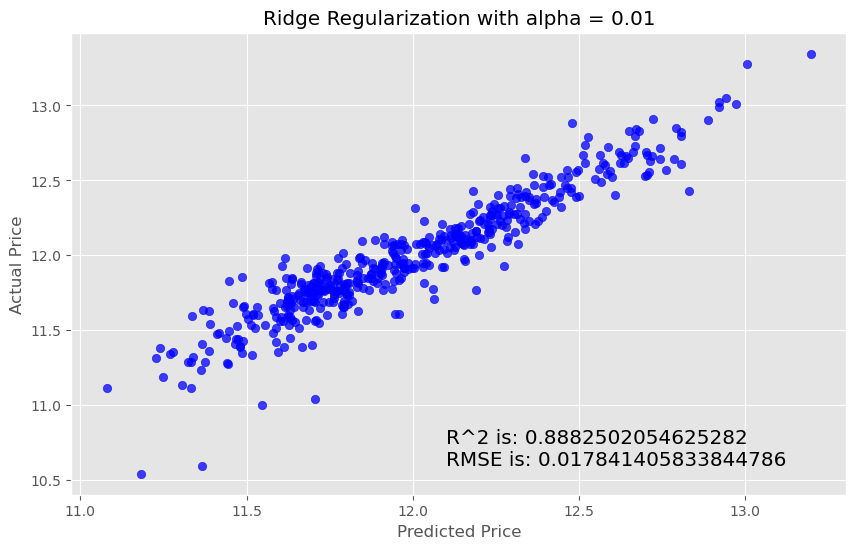

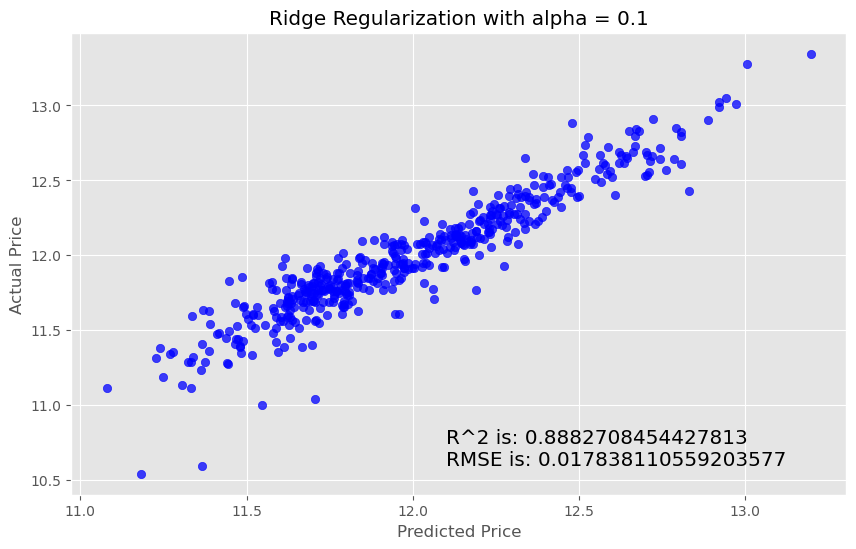

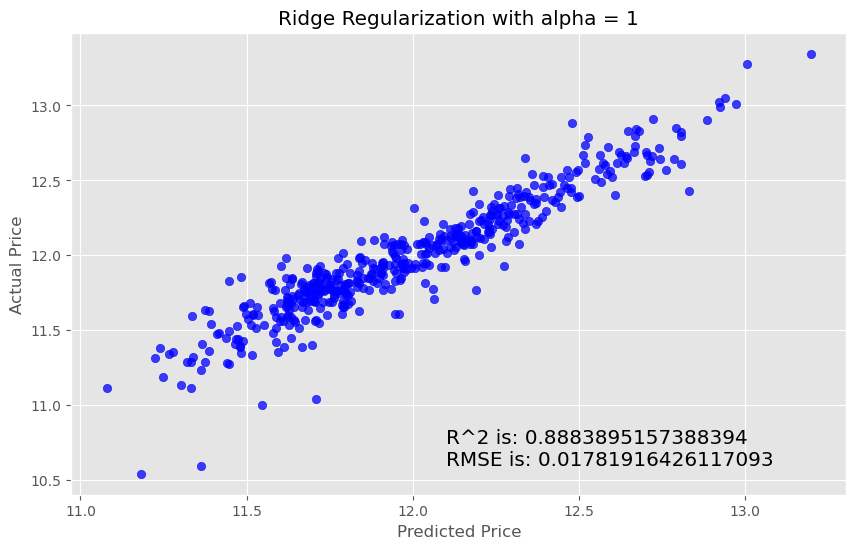

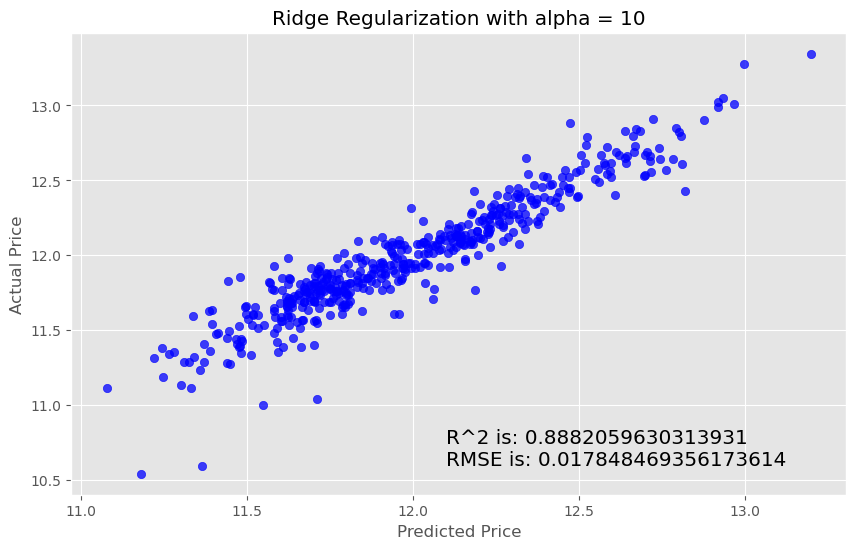

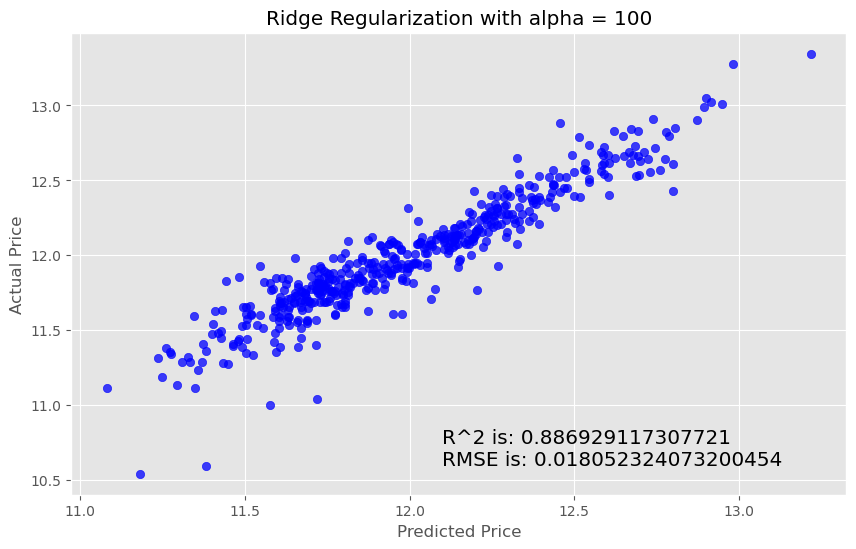

In [129]:
# We are going to experiment by looping through a few different values of alpha, and see how this changes our results.

for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(text = overlay, xy = (12.1,10.6),size='x-large')
    plt.show()
    
# These models perform almost identical to the first model. In this case, adjusting did not substanially imporve the model.



In [126]:
# if you examined the plots you can see these models perform almost identically to the first model.
# In our case, adjusting the alpha did not substantially improve our model.
print("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.8882477709262533


#  Making the submission  (Visualize the results and submit the csv.file)     

In [62]:
# create a csv that contains the predicted SalePrice for each observation in the test.csv dataset.
submission = pd.DataFrame()
# The first column must the contain the ID from the test data.
submission['Id'] = test.Id

In [63]:
# select the features from the test data for the model as we did above.
feats = test.select_dtypes(
    include=[np.number]).drop(['Id'], axis=1).interpolate()

In [64]:
# generate predictions
predictions = model.predict(feats)

In [65]:
# transform the predictions to the correct form
# apply np.exp() to our predictions becasuse we have taken the logarithm(np.log()) previously.
final_predictions = np.exp(predictions)

In [66]:
# check the difference
print("Original predictions are: \n", predictions[:10], "\n")
print("Final predictions are: \n", final_predictions[:10])

Original predictions are: 
 [11.76725362 11.71929504 12.07656074 12.20632678 12.11217655 12.05709882
 12.16036698 12.01665734 12.17126892 11.66318882] 

Final predictions are: 
 [128959.49172585 122920.74024359 175704.82598102 200050.83263755
 182075.46986405 172318.33397533 191064.621642   165488.55901671
 193158.99133191 116214.02546462]


In [57]:
# assign these predictions and check
submission['SalePrice'] = final_predictions
# submission.head()
print(submission.head())

# export to a .csv file as Kaggle expects.
# pass index=False because Pandas otherwise would create a new index for us.
submission.to_csv('submission1.csv', index=False)


print("\n Finish")


     Id      SalePrice
0  1461  128959.491726
1  1462  122920.740244
2  1463  175704.825981
3  1464  200050.832638
4  1465  182075.469864

 Finish
